In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dask.dataframe as dd 
import numpy as np 
import os,sys
import logging
import fastparquet
import gc
import cPickle as pickle 

In [3]:
sys.path.insert(0,"../python/")

In [52]:
from zillow import features,config,info,utils

In [5]:
config.YEARS

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [14]:
for i in range(len(config.YEARS)-1):
    a=features.get('totalassessedvalue','19',config.YEARS[i])
    b=features.get('totalassessedvalue','19',config.YEARS[i+1])
    c=b/a
    c=c.dropna()
    print config.YEARS[i+1],len(c.dropna()), np.round(np.percentile(c.dropna().values,[10,25,50,75,90]),3), (np.abs(c-1)<0.005).mean()

2008 476395 [1.    1.    1.017 1.092 1.198] 0.4314675846723832
2009 504194 [0.976 0.999 1.    1.014 1.054] 0.4643847407942181
2010 448129 [0.986 1.    1.    1.027 1.076] 0.5591470313235698
2011 537525 [0.923 0.955 0.991 1.01  1.053] 0.20353285893679363
2012 574373 [0.915 0.967 1.    1.    1.   ] 0.6059633722337227
2013 470522 [0.911 0.961 0.996 1.    1.054] 0.33590777901989705
2014 344893 [1.    1.    1.    1.    1.155] 0.7729672681092397
2015 491439 [0.97  1.    1.    1.046 1.095] 0.44166824366808494
2016 653228 [0.995 1.    1.    1.001 1.06 ] 0.6716154237111698
2017 297399 [1.    1.    1.044 1.09  1.117] 0.33308787184893024


In [32]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [35]:
lst=[]
for i in range(len(config.YEARS)-1):
    a=features.get('totalassessedvalue','19',config.YEARS[i])
    b=features.get('totalassessedvalue','19',config.YEARS[i+1])
    bb=features.get('county','19')
    c=(b/a).to_frame()
    c['county']=bb.loc[c.index]
    c=c.dropna()
    print config.YEARS[i+1],len(c.dropna()), (np.abs(c['totalassessedvalue']-1)<0.005).mean()
    c['r']=(np.abs(c['totalassessedvalue']-1)<0.005).astype(np.float32)
    #cc=c[['county','r']].groupby('county').aggregate({'median': np.median, 'c':'count'})
    cc=c[['county','r']].groupby('county').aggregate(['median','count',percentile(10),percentile(90)])
    cc['year']=config.YEARS[i+1]
    display(cc)
    lst.append(cc)
lst=pd.concat(lst)

2008 476395 0.4314675846723832


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
19005     0.0    3735           0.0           0.0  2008
19013     0.0   43959           0.0           0.0  2008
19015     0.0    7232           0.0           0.0  2008
19033     0.0   11262           0.0           0.0  2008
19035     0.0    3788           0.0           0.0  2008
19049     0.0   17113           0.0           1.0  2008
19067     0.0       2           0.0           0.0  2008
19077     0.0    1843           0.0           1.0  2008
19081     0.0    2895           0.0           0.0  2008
19085     0.0    4062           0.0           0.0  2008
19089     0.0    3000           0.0           0.0  2008
19099     0.0    9595           0.0           0.0  2008
19113     1.0   66163           1.0           1.0  2008
19115     1.0    2325           0.0           1.0  2008
19123     0.0    5500           0.0           0.0  2008
19125     0.0    7078           0.0           0.0  2008
19127     0.0   13721           0.0           0.0  2008
19139     0.0   11571           0.0           0.0  2008
19141     0.0    4435           0.0           0.0  2008
19149     0.0    7398           0.0           0.0  2008
19153     1.0  139428           1.0           1.0  2008
19155     0.0       1           0.0           0.0  2008
19163     0.0   45568           0.0           0.0  2008
19169     0.0   12798           0.0           0.0  2008
19179     0.0   10478           0.0           0.0  2008
19181     0.0   12305           0.0           0.0  2008
19189     0.0    3864           0.0           0.0  2008
19193     0.0   25276           0.0           0.0  2008

2009 504194 0.4643847407942181


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
19005     0.0    3888           0.0           0.0  2009
19013     1.0   44772           1.0           1.0  2009
19015     0.0    7382           0.0           0.0  2009
19033     1.0   11303           0.0           1.0  2009
19035     0.0    3839           0.0           1.0  2009
19049     0.0   18486           0.0           1.0  2009
19061     1.0   28174           1.0           1.0  2009
19067     1.0       2           1.0           1.0  2009
19077     0.0    2130           0.0           0.0  2009
19081     0.0    3524           0.0           0.0  2009
19085     0.0    4076           0.0           1.0  2009
19089     0.0    3050           0.0           1.0  2009
19099     0.0    9768           0.0           1.0  2009
19103     1.0   37665           0.0           1.0  2009
19113     1.0       7           0.0           1.0  2009
19115     1.0    2338           1.0           1.0  2009
19123     0.0    5579           0.0           1.0  2009
19125     0.0    8292           0.0           1.0  2009
19127     1.0   13845           0.0           1.0  2009
19139     0.0   11565           0.0           1.0  2009
19141     0.0    4514           0.0           0.0  2009
19149     0.0    7499           0.0           0.0  2009
19153     0.0  141034           0.0           1.0  2009
19155     1.0       1           1.0           1.0  2009
19163     1.0   50595           0.0           1.0  2009
19169     0.0   16796           0.0           0.0  2009
19179     0.0   10584           0.0           1.0  2009
19181     0.0   12474           0.0           0.0  2009
19187     0.0   11541           0.0           0.0  2009
19189     0.0    3894           0.0           0.0  2009
19193     0.0   25577           0.0           0.0  2009

2010 448129 0.5591470313235698


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
19005     0.0    3918           0.0           0.0  2010
19013     1.0   45760           1.0           1.0  2010
19015     0.0    7374           0.0           0.0  2010
19033     0.0   11356           0.0           0.0  2010
19035     0.0    3870           0.0           1.0  2010
19049     0.0   19254           0.0           0.0  2010
19061     1.0   28341           1.0           1.0  2010
19067     1.0       2           1.0           1.0  2010
19077     0.0    2139           0.0           0.0  2010
19081     0.0    3533           0.0           0.0  2010
19085     0.0    4151           0.0           1.0  2010
19089     0.0    3098           0.0           0.0  2010
19099     0.0    9763           0.0           0.0  2010
19103     1.0       1           1.0           1.0  2010
19113     1.0       4           1.0           1.0  2010
19115     1.0    2336           1.0           1.0  2010
19123     0.0    5624           0.0           0.0  2010
19125     0.0    8325           0.0           0.0  2010
19127     0.0   13867           0.0           1.0  2010
19139     0.0   11586           0.0           0.0  2010
19141     0.0    4514           0.0           0.0  2010
19149     0.0    7505           0.0           0.0  2010
19153     1.0  141768           1.0           1.0  2010
19155     1.0   28375           1.0           1.0  2010
19169     0.0   16986           0.0           1.0  2010
19179     0.0   10631           0.0           0.0  2010
19181     0.0   12748           0.0           0.0  2010
19187     0.0   11533           0.0           0.0  2010
19189     0.0    3937           0.0           0.0  2010
19193     0.0   25830           0.0           0.0  2010

2011 537525 0.20353285893679363


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
19005     0.0    3942           0.0           0.0  2011
19013     0.0   46043           0.0           0.0  2011
19015     0.0    7335           0.0           1.0  2011
19033     1.0   11361           0.0           1.0  2011
19035     0.0    3900           0.0           0.0  2011
19043     0.0    7167           0.0           0.0  2011
19049     0.0   19782           0.0           0.0  2011
19061     0.0   28453           0.0           1.0  2011
19067     0.0    6479           0.0           0.0  2011
19077     0.0    2109           0.0           1.0  2011
19081     0.0    3699           0.0           1.0  2011
19085     0.0    4147           0.0           1.0  2011
19089     0.0    3118           0.0           0.0  2011
19099     0.0    9747           0.0           1.0  2011
19103     0.0       5           0.0           0.6  2011
19113     1.0   70997           0.0           1.0  2011
19115     1.0    2322           1.0           1.0  2011
19123     0.0    5612           0.0           0.0  2011
19125     0.0    8463           0.0           1.0  2011
19127     0.0   13909           0.0           0.0  2011
19137     0.0    3987           0.0           1.0  2011
19139     0.0   11845           0.0           0.0  2011
19141     0.0    4498           0.0           1.0  2011
19149     0.0    7489           0.0           0.0  2011
19153     0.0  142378           0.0           0.0  2011
19155     0.0   28431           0.0           0.0  2011
19163     1.0       1           1.0           1.0  2011
19169     0.0   16178           0.0           1.0  2011
19179     0.0   10614           0.0           0.0  2011
19181     0.0   13021           0.0           0.0  2011
19187     0.0   11543           0.0           0.0  2011
19189     0.0    3197           0.0           0.0  2011
19193     0.0   25753           0.0           0.0  2011

2012 574373 0.6059633722337227


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
19005     0.0    3977           0.0           0.0  2012
19013     1.0   46310           1.0           1.0  2012
19015     0.0    7587           0.0           0.0  2012
19033     0.0   11345           0.0           0.0  2012
19035     0.0    3936           0.0           0.0  2012
19043     1.0    7208           0.0           1.0  2012
19049     0.0   20349           0.0           0.0  2012
19061     1.0   28952           1.0           1.0  2012
19067     1.0    6469           1.0           1.0  2012
19077     0.0    2095           0.0           0.0  2012
19081     0.0    3799           0.0           0.0  2012
19085     0.0    4257           0.0           0.0  2012
19089     0.0    3167           0.0           0.0  2012
19099     0.0    9771           0.0           0.0  2012
19103     1.0   38387           1.0           1.0  2012
19113     1.0   71800           0.0           1.0  2012
19115     1.0    2330           1.0           1.0  2012
19123     0.0    5756           0.0           0.0  2012
19125     0.0    8616           0.0           0.0  2012
19127     0.0   13957           0.0           0.0  2012
19137     1.0    3996           1.0           1.0  2012
19139     0.0   11865           0.0           0.0  2012
19141     0.0    4655           0.0           0.0  2012
19149     0.0    7546           0.0           0.0  2012
19153     1.0  142992           1.0           1.0  2012
19155     1.0   28478           1.0           1.0  2012
19163     1.0       1           1.0           1.0  2012
19169     0.0   21793           0.0           1.0  2012
19179     0.0   10635           0.0           0.0  2012
19181     0.0   13265           0.0           0.0  2012
19189     0.0    3197           0.0           0.0  2012
19193     0.0   25882           0.0           0.0  2012

2013 470522 0.33590777901989705


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
19005     0.0    4180           0.0           0.0  2013
19013     0.0       7           0.0           1.0  2013
19015     0.0    8069           0.0           0.0  2013
19033     0.0   15112           0.0           0.0  2013
19035     0.0    3960           0.0           0.0  2013
19043     1.0    7421           0.0           1.0  2013
19049     0.0   22124           0.0           0.0  2013
19061     0.0       8           0.0           1.0  2013
19067     1.0    6469           0.0           1.0  2013
19077     0.0    1668           0.0           0.0  2013
19081     0.0    4027           0.0           1.0  2013
19085     0.0    4835           0.0           0.0  2013
19089     0.0    3273           0.0           0.0  2013
19099     0.0       1           0.0           0.0  2013
19103     1.0       5           0.0           1.0  2013
19113     0.0   73954           0.0           1.0  2013
19115     1.0    2343           1.0           1.0  2013
19123     0.0    6435           0.0           0.0  2013
19125     0.0    9439           0.0           1.0  2013
19127     0.0   14014           0.0           0.0  2013
19139     0.0   11973           0.0           1.0  2013
19141     0.0    4941           0.0           1.0  2013
19149     0.0    7843           0.0           0.0  2013
19153     0.0  143698           0.0           1.0  2013
19155     1.0   28512           1.0           1.0  2013
19163     1.0       1           1.0           1.0  2013
19169     1.0   25941           0.0           1.0  2013
19179     0.0   11103           0.0           0.0  2013
19181     0.0   13622           0.0           0.0  2013
19189     0.0    3552           0.0           0.0  2013
19193     0.0   31992           0.0           0.0  2013

2014 344893 0.7729672681092397


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
19005     1.0       2           1.0           1.0  2014
19013     1.0       7           0.0           1.0  2014
19015     0.0    8166           0.0           0.0  2014
19033     0.0       7           0.0           0.0  2014
19043     1.0    7490           1.0           1.0  2014
19059     1.0   11730           1.0           1.0  2014
19061     1.0       8           1.0           1.0  2014
19067     1.0    6504           1.0           1.0  2014
19081     0.0    4091           0.0           0.0  2014
19085     0.0    4925           0.0           0.0  2014
19089     1.0       1           1.0           1.0  2014
19095     1.0      26           1.0           1.0  2014
19103     1.0       5           0.4           1.0  2014
19113     1.0   74349           1.0           1.0  2014
19115     1.0    2348           0.0           1.0  2014
19123     0.0    6774           0.0           0.0  2014
19127     0.0   14049           0.0           0.0  2014
19141     0.0    5005           0.0           0.0  2014
19149     0.0    7950           0.0           0.0  2014
19153     1.0  144774           1.0           1.0  2014
19155     1.0   28566           1.0           1.0  2014
19163     1.0       1           1.0           1.0  2014
19179     0.0     298           0.0           0.0  2014
19181     0.0   13826           0.0           0.0  2014
19189     0.0    3990           0.0           0.0  2014
19193     0.0       1           0.0           0.0  2014

2015 491439 0.44166824366808494


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
19005     0.0       2           0.0           0.0  2015
19013     0.0   47405           0.0           1.0  2015
19015     1.0    8276           1.0           1.0  2015
19033     1.0       7           0.0           1.0  2015
19043     0.0    7563           0.0           1.0  2015
19059     0.0   11810           0.0           0.0  2015
19061     0.0   29976           0.0           1.0  2015
19067     1.0    6534           0.0           1.0  2015
19081     1.0    4729           0.0           1.0  2015
19085     1.0    5682           0.0           1.0  2015
19089     0.0       1           0.0           0.0  2015
19095     0.0      26           0.0           0.0  2015
19099     0.0       3           0.0           0.0  2015
19103     1.0       7           0.0           1.0  2015
19113     1.0   75278           0.0           1.0  2015
19115     0.0    2368           0.0           1.0  2015
19123     1.0    6844           1.0           1.0  2015
19127     0.0   14666           0.0           0.0  2015
19137     0.0    4053           0.0           0.0  2015
19141     1.0    6332           1.0           1.0  2015
19149     0.0    8968           0.0           0.0  2015
19153     0.0  146539           0.0           0.0  2015
19155     1.0   28655           1.0           1.0  2015
19163     1.0   57004           0.0           1.0  2015
19169     0.0       2           0.0           0.0  2015
19179     1.0     307           1.0           1.0  2015
19181     0.0   14241           0.0           1.0  2015
19189     1.0    4160           1.0           1.0  2015
19193     0.0       1           0.0           0.0  2015

2016 653228 0.6716154237111698


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
19005     1.0    6604           0.0           1.0  2016
19013     1.0   47665           1.0           1.0  2016
19015     1.0    8489           0.0           1.0  2016
19033     1.0   17476           1.0           1.0  2016
19035     0.0    4274           0.0           0.0  2016
19043     0.0       2           0.0           0.0  2016
19049     0.0   28014           0.0           1.0  2016
19059     1.0   11904           1.0           1.0  2016
19061     1.0   30036           1.0           1.0  2016
19067     0.0    6592           0.0           0.0  2016
19077     0.0    3768           0.0           0.0  2016
19081     0.0    4766           0.0           0.0  2016
19085     0.0    5705           0.0           0.0  2016
19089     1.0    3429           0.0           1.0  2016
19095     1.0    4321           0.0           1.0  2016
19099     1.0   11043           0.0           1.0  2016
19103     1.0   43163           0.0           1.0  2016
19113     0.0   75276           0.0           1.0  2016
19115     1.0    2377           1.0           1.0  2016
19123     1.0    6872           1.0           1.0  2016
19125     0.0   11218           0.0           0.0  2016
19127     1.0   15110           0.0           1.0  2016
19139     0.0   12875           0.0           1.0  2016
19141     0.0    6329           0.0           1.0  2016
19149     0.0    9038           0.0           0.0  2016
19153     1.0  147662           1.0           1.0  2016
19155     0.0       1           0.0           0.0  2016
19163     0.0   57138           0.0           0.0  2016
19169     1.0   28717           1.0           1.0  2016
19179     1.0   11879           1.0           1.0  2016
19181     1.0   14243           0.0           1.0  2016
19187     1.0   13065           1.0           1.0  2016
19189     0.0    4176           0.0           0.0  2016
19193     0.0       1           0.0           0.0  2016

2017 297399 0.33308787184893024


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
19005     1.0    6593           0.0           1.0  2017
19013     1.0   48061           0.0           1.0  2017
19015     1.0       1           1.0           1.0  2017
19033     0.0   17476           0.0           1.0  2017
19043     1.0       1           1.0           1.0  2017
19049     1.0       1           1.0           1.0  2017
19067     1.0    6658           0.0           1.0  2017
19077     1.0    3770           0.0           1.0  2017
19081     1.0    4765           0.0           1.0  2017
19085     1.0    5704           1.0           1.0  2017
19089     1.0    3427           1.0           1.0  2017
19095     0.0    4321           0.0           0.0  2017
19099     1.0   11032           0.0           1.0  2017
19103     0.0       5           0.0           0.0  2017
19113     0.0      31           0.0           1.0  2017
19115     0.0       2           0.0           0.0  2017
19127     1.0       1           1.0           1.0  2017
19141     1.0    6406           0.0           1.0  2017
19153     0.0  147658           0.0           0.0  2017
19155     1.0       1           1.0           1.0  2017
19179     1.0       1           1.0           1.0  2017
19181     0.0   14242           0.0           0.0  2017
19187     1.0   13064           1.0           1.0  2017
19189     0.0    4178           0.0           1.0  2017

In [39]:
lst.loc["19153"]

r                                      year
       median   count percentile_10 percentile_90      
county                                                 
19153     1.0  139428           1.0           1.0  2008
19153     0.0  141034           0.0           1.0  2009
19153     1.0  141768           1.0           1.0  2010
19153     0.0  142378           0.0           0.0  2011
19153     1.0  142992           1.0           1.0  2012
19153     0.0  143698           0.0           1.0  2013
19153     1.0  144774           1.0           1.0  2014
19153     0.0  146539           0.0           0.0  2015
19153     1.0  147662           1.0           1.0  2016
19153     0.0  147658           0.0           0.0  2017

In [42]:
lst=[]
for i in range(len(config.YEARS)-1):
    a=features.get('totalassessedvalue','37',config.YEARS[i])
    b=features.get('totalassessedvalue','37',config.YEARS[i+1])
    bb=features.get('county','37')
    c=(b/a).to_frame()
    c['county']=bb.loc[c.index]
    c=c.dropna()
    print config.YEARS[i+1],len(c.dropna()), (np.abs(c['totalassessedvalue']-1)<0.005).mean()
    c['r']=(np.abs(c['totalassessedvalue']-1)<0.005).astype(np.float32)
    #cc=c[['county','r']].groupby('county').aggregate({'median': np.median, 'c':'count'})
    cc=c[['county','r']].groupby('county').aggregate(['median','count',percentile(10),percentile(90)])
    cc['year']=config.YEARS[i+1]
    cc=cc[cc['r']['count']>100]
    display(cc)
    lst.append(cc)
lst=pd.concat(lst)

2008 1342521 0.6750531276605729


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
37007     1.0    8261           1.0           1.0  2008
37025     0.0   59847           0.0           0.0  2008
37027     1.0   31057           1.0           1.0  2008
37035     0.0   50829           0.0           0.0  2008
37037     1.0   17530           1.0           1.0  2008
37045     0.0   26735           0.0           0.0  2008
37049     1.0   31086           1.0           1.0  2008
37051     1.0   99951           1.0           1.0  2008
37055     1.0    8732           1.0           1.0  2008
37063     0.0   76766           0.0           0.0  2008
37067     1.0   68714           1.0           1.0  2008
37069     1.0    4913           1.0           1.0  2008
37071     0.0   63400           0.0           0.0  2008
37077     1.0   11431           1.0           1.0  2008
37081     1.0   98096           1.0           1.0  2008
37083     1.0   10397           1.0           1.0  2008
37085     1.0   31168           1.0           1.0  2008
37087     1.0   24114           1.0           1.0  2008
37089     1.0   37569           1.0           1.0  2008
37097     1.0   56067           0.0           1.0  2008
37109     0.0   24443           0.0           0.0  2008
37119     1.0  250551           1.0           1.0  2008
37127     1.0   20215           0.0           1.0  2008
37133     1.0   40073           1.0           1.0  2008
37135     1.0   33500           1.0           1.0  2008
37147     0.0   28991           0.0           0.0  2008
37157     1.0   24110           1.0           1.0  2008
37165     1.0    8633           1.0           1.0  2008
37167     1.0   20657           1.0           1.0  2008
37179     0.0   74546           0.0           0.0  2008

2009 1323486 0.6992231122958611


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
37007     1.0    8362           0.0           1.0  2009
37025     0.0   62672           0.0           1.0  2009
37027     1.0   31057           1.0           1.0  2009
37035     0.0   51764           0.0           0.0  2009
37037     0.0   18471           0.0           0.0  2009
37049     1.0   31544           1.0           1.0  2009
37051     0.0  101919           0.0           0.0  2009
37055     1.0    8854           1.0           1.0  2009
37063     1.0   78149           1.0           1.0  2009
37067     0.0   71734           0.0           0.0  2009
37069     1.0   17312           1.0           1.0  2009
37071     1.0   65714           1.0           1.0  2009
37077     1.0   14412           1.0           1.0  2009
37081     1.0  100482           1.0           1.0  2009
37083     1.0   10451           1.0           1.0  2009
37085     0.0   27485           0.0           0.0  2009
37089     1.0   38890           1.0           1.0  2009
37097     1.0   58098           0.0           1.0  2009
37119     1.0  265883           1.0           1.0  2009
37133     1.0   41775           1.0           1.0  2009
37135     0.0   31631           0.0           0.0  2009
37147     1.0   44528           1.0           1.0  2009
37157     1.0   24145           1.0           1.0  2009
37165     1.0    8716           1.0           1.0  2009
37167     1.0   20992           1.0           1.0  2009
37169     0.0   11568           0.0           0.0  2009
37179     1.0   76709           1.0           1.0  2009

2010 1787766 0.8793829841265579


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
37003     1.0    5097           1.0           1.0  2010
37007     1.0    8402           1.0           1.0  2010
37015     1.0    6904           0.0           1.0  2010
37021     1.0   74348           1.0           1.0  2010
37025     1.0   63543           1.0           1.0  2010
37027     1.0   31146           1.0           1.0  2010
37031     1.0   37587           1.0           1.0  2010
37035     0.0   51222           0.0           0.0  2010
37037     1.0   19206           1.0           1.0  2010
37049     0.0   31801           0.0           0.0  2010
37051     1.0  103296           1.0           1.0  2010
37053     1.0    5996           1.0           1.0  2010
37055     1.0    8875           1.0           1.0  2010
37059     1.0   14067           1.0           1.0  2010
37063     1.0   80044           1.0           1.0  2010
37067     1.0  105912           1.0           1.0  2010
37069     1.0   17607           1.0           1.0  2010
37071     1.0   66525           1.0           1.0  2010
37077     0.0   14969           0.0           0.0  2010
37081     1.0  104526           1.0           1.0  2010
37083     1.0   10503           1.0           1.0  2010
37085     1.0   27488           1.0           1.0  2010
37089     1.0   39767           1.0           1.0  2010
37097     1.0   59301           1.0           1.0  2010
37113     1.0    5896           1.0           1.0  2010
37119     1.0  282336           1.0           1.0  2010
37133     0.0   43332           0.0           0.0  2010
37135     1.0   31630           1.0           1.0  2010
37147     1.0   44949           1.0           1.0  2010
37157     1.0   24022           1.0           1.0  2010
37161     1.0   10678           1.0           1.0  2010
37165     1.0    8749           1.0           1.0  2010
37167     1.0   21236           1.0           1.0  2010
37179     1.0   69421           1.0           1.0  2010
37183     1.0  254283           1.0           1.0  2010
37187     1.0    2946           1.0           1.0  2010

2011 2197753 0.7452252368669273


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
37003     1.0    5224           1.0           1.0  2011
37007     0.0    8373           0.0           0.0  2011
37015     1.0    7252           1.0           1.0  2011
37021     1.0   74904           1.0           1.0  2011
37025     1.0   64917           1.0           1.0  2011
37027     1.0   31205           1.0           1.0  2011
37029     1.0    2058           1.0           1.0  2011
37035     0.0   51491           0.0           0.0  2011
37037     1.0   19583           1.0           1.0  2011
37039     1.0    4692           1.0           1.0  2011
37045     1.0   26752           1.0           1.0  2011
37049     1.0   31965           0.0           1.0  2011
37051     1.0  104340           1.0           1.0  2011
37053     1.0    6149           1.0           1.0  2011
37055     1.0    8944           1.0           1.0  2011
37059     1.0   13850           1.0           1.0  2011
37061     1.0   14348           1.0           1.0  2011
37063     1.0   80798           1.0           1.0  2011
37067     1.0  110592           1.0           1.0  2011
37069     1.0   17796           1.0           1.0  2011
37071     1.0   67469           1.0           1.0  2011
37073     1.0    2473           1.0           1.0  2011
37077     1.0   15330           1.0           1.0  2011
37081     1.0  172231           1.0           1.0  2011
37083     1.0   10551           1.0           1.0  2011
37085     1.0   28283           1.0           1.0  2011
37089     0.0   38976           0.0           0.0  2011
37091     0.0    2910           0.0           0.0  2011
37093     1.0   10852           1.0           1.0  2011
37097     0.0   57156           0.0           0.0  2011
37103     1.0    2012           1.0           1.0  2011
37105     1.0   18230           1.0           1.0  2011
37113     1.0   20868           1.0           1.0  2011
37115     1.0    4718           1.0           1.0  2011
37119     0.0  285602           0.0           0.0  2011
37121     1.0    3288           1.0           1.0  2011
37127     1.0   21320           0.0           1.0  2011
37129     1.0   71715           1.0           1.0  2011
37133     1.0   44816           1.0           1.0  2011
37135     1.0   34138           1.0           1.0  2011
37141     0.0   19778           0.0           0.0  2011
37143     1.0    3831           1.0           1.0  2011
37145     1.0   12832           1.0           1.0  2011
37147     1.0   45459           1.0           1.0  2011
37151     1.0   44301           1.0           1.0  2011
37157     0.0   23837           0.0           0.0  2011
37161     0.0   18245           0.0           0.0  2011
37167     1.0   21463           1.0           1.0  2011
37171     1.0   14452           1.0           1.0  2011
37173     1.0    5596           1.0           1.0  2011
37175     1.0   13426           1.0           1.0  2011
37177     1.0     730           1.0           1.0  2011
37179     1.0   69463           1.0           1.0  2011
37183     1.0  259586           1.0           1.0  2011
37187     1.0    2951           1.0           1.0  2011
37189     1.0   21438           1.0           1.0  2011
37195     1.0   16302           1.0           1.0  2011
37199     1.0    5600           1.0           1.0  2011

2012 2273220 0.7742343459937886


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
37003     1.0    9704           1.0           1.0  2012
37005     1.0    3143           1.0           1.0  2012
37009     1.0    7688           1.0           1.0  2012
37015     0.0    7292           0.0           0.0  2012
37021     1.0   76389           1.0           1.0  2012
37025     0.0   65236           0.0           0.0  2012
37027     1.0   31261           1.0           1.0  2012
37035     0.0   53534           0.0           0.0  2012
37037     1.0   20363           1.0           1.0  2012
37039     0.0    5245           0.0           0.0  2012
37045     1.0   26884           1.0           1.0  2012
37049     1.0   32082           1.0           1.0  2012
37051     1.0  107405           1.0           1.0  2012
37055     1.0    8966           1.0           1.0  2012
37057     1.0   55867           1.0           1.0  2012
37059     1.0   13560           1.0           1.0  2012
37061     1.0   14810           1.0           1.0  2012
37063     1.0   81846           1.0           1.0  2012
37067     1.0  112021           1.0           1.0  2012
37069     0.0   18085           0.0           0.0  2012
37071     1.0   67984           1.0           1.0  2012
37073     1.0    2460           1.0           1.0  2012
37077     1.0   15429           1.0           1.0  2012
37081     0.0  172574           0.0           0.0  2012
37083     1.0   10596           1.0           1.0  2012
37085     1.0   30944           1.0           1.0  2012
37089     1.0   39121           1.0           1.0  2012
37091     1.0    3130           1.0           1.0  2012
37097     1.0   58040           0.0           1.0  2012
37103     1.0    2022           1.0           1.0  2012
37105     1.0   18275           1.0           1.0  2012
37113     1.0   20552           1.0           1.0  2012
37117     1.0    4371           1.0           1.0  2012
37119     1.0  289132           1.0           1.0  2012
37121     1.0    3385           1.0           1.0  2012
37127     1.0   21102           1.0           1.0  2012
37129     0.0   71931           0.0           0.0  2012
37133     1.0   46767           1.0           1.0  2012
37135     1.0   34133           1.0           1.0  2012
37141     1.0   20362           1.0           1.0  2012
37143     1.0    3825           1.0           1.0  2012
37145     1.0   12919           1.0           1.0  2012
37147     0.0   45806           0.0           0.0  2012
37151     1.0   44562           1.0           1.0  2012
37157     1.0   23767           1.0           1.0  2012
37161     1.0   23202           1.0           1.0  2012
37167     1.0   21605           1.0           1.0  2012
37171     0.0   16033           0.0           0.0  2012
37173     1.0    5558           1.0           1.0  2012
37175     1.0   12938           1.0           1.0  2012
37179     1.0   79559           1.0           1.0  2012
37181     1.0    5605           1.0           1.0  2012
37183     1.0  263056           1.0           1.0  2012
37187     1.0    2964           1.0           1.0  2012
37189     1.0   22474           1.0           1.0  2012
37199     1.0    5315           1.0           1.0  2012

2013 2065668 0.7986399556947196


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
37005     1.0    3198           1.0           1.0  2013
37009     1.0    7722           1.0           1.0  2013
37015     1.0    7474           1.0           1.0  2013
37021     0.0   77550           0.0           0.0  2013
37025     1.0   65532           1.0           1.0  2013
37027     0.0   31460           0.0           0.0  2013
37035     0.0   53822           0.0           0.0  2013
37037     1.0   20361           1.0           1.0  2013
37045     1.0   27109           1.0           1.0  2013
37049     1.0   32263           1.0           1.0  2013
37051     1.0  108555           1.0           1.0  2013
37057     1.0   56408           1.0           1.0  2013
37059     0.0   13650           0.0           0.0  2013
37061     1.0   15036           1.0           1.0  2013
37063     1.0   82172           1.0           1.0  2013
37067     0.0  108720           0.0           0.0  2013
37069     1.0   18276           1.0           1.0  2013
37073     1.0    2480           1.0           1.0  2013
37077     1.0   15813           1.0           1.0  2013
37081     1.0  172747           1.0           1.0  2013
37083     1.0   10665           1.0           1.0  2013
37089     1.0   39393           1.0           1.0  2013
37091     1.0    3145           1.0           1.0  2013
37097     1.0   61520           1.0           1.0  2013
37103     1.0    2048           1.0           1.0  2013
37105     0.0   18321           0.0           0.0  2013
37119     1.0  290221           0.0           1.0  2013
37121     1.0    3454           0.0           1.0  2013
37123     1.0    4980           1.0           1.0  2013
37129     1.0   73139           1.0           1.0  2013
37133     1.0   48698           1.0           1.0  2013
37135     1.0   34128           1.0           1.0  2013
37139     1.0   11078           1.0           1.0  2013
37143     1.0    3820           1.0           1.0  2013
37147     1.0   46067           1.0           1.0  2013
37157     1.0   23756           1.0           1.0  2013
37161     1.0   23242           1.0           1.0  2013
37165     1.0    7257           1.0           1.0  2013
37167     0.0   21711           0.0           0.0  2013
37171     1.0   16244           1.0           1.0  2013
37173     0.0    5545           0.0           0.0  2013
37175     1.0   13165           1.0           1.0  2013
37179     1.0   79958           1.0           1.0  2013
37181     1.0    5480           1.0           1.0  2013
37183     1.0  266963           1.0           1.0  2013
37187     0.0    3003           0.0           0.0  2013
37189     1.0   22702           1.0           1.0  2013
37199     1.0    5315           1.0           1.0  2013

2014 1888668 0.8601411153257216


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
37005     1.0    3212           1.0           1.0  2014
37009     1.0    7755           1.0           1.0  2014
37015     1.0    7659           1.0           1.0  2014
37021     1.0   78307           1.0           1.0  2014
37025     1.0   66191           1.0           1.0  2014
37027     1.0   31550           1.0           1.0  2014
37031     1.0   38457           1.0           1.0  2014
37035     0.0   54194           0.0           0.0  2014
37037     1.0   20867           1.0           1.0  2014
37045     1.0   27216           1.0           1.0  2014
37049     1.0   32370           1.0           1.0  2014
37051     1.0  109555           1.0           1.0  2014
37057     1.0   56677           1.0           1.0  2014
37059     1.0   14417           1.0           1.0  2014
37063     1.0   82837           1.0           1.0  2014
37067     1.0  110186           1.0           1.0  2014
37069     1.0   18534           1.0           1.0  2014
37077     1.0   15933           1.0           1.0  2014
37081     1.0  173342           1.0           1.0  2014
37083     1.0   10643           1.0           1.0  2014
37097     1.0   62034           1.0           1.0  2014
37105     1.0   18458           1.0           1.0  2014
37107     1.0   13582           1.0           1.0  2014
37115     1.0    4906           0.0           1.0  2014
37119     1.0  289366           0.0           1.0  2014
37133     0.0   51206           0.0           0.0  2014
37135     1.0   34909           1.0           1.0  2014
37137     0.0    4273           0.0           0.0  2014
37139     0.0   11146           0.0           0.0  2014
37143     1.0    3830           1.0           1.0  2014
37147     1.0   46448           1.0           1.0  2014
37153     1.0    1761           1.0           1.0  2014
37165     0.0    8681           0.0           0.0  2014
37175     1.0   13239           0.0           1.0  2014
37179     1.0   80881           1.0           1.0  2014
37183     1.0  271291           1.0           1.0  2014
37191     1.0   12411           1.0           1.0  2014

2015 2262390 0.6777933954800013


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
37005     0.0    3243           0.0           0.0  2015
37009     0.0    7794           0.0           0.0  2015
37015     1.0    7749           1.0           1.0  2015
37019     0.0   64416           0.0           0.0  2015
37021     1.0   79537           1.0           1.0  2015
37025     1.0   67190           1.0           1.0  2015
37027     1.0   31681           1.0           1.0  2015
37031     0.0   39315           0.0           0.0  2015
37033     0.0    6783           0.0           0.0  2015
37035     0.0   54967           0.0           0.0  2015
37037     1.0   21755           1.0           1.0  2015
37045     1.0   27272           1.0           1.0  2015
37049     1.0   32471           1.0           1.0  2015
37051     1.0  110270           1.0           1.0  2015
37057     0.0   57094           0.0           0.0  2015
37059     1.0   14673           1.0           1.0  2015
37063     1.0   83485           1.0           1.0  2015
37065     0.0   16253           0.0           0.0  2015
37067     1.0  119634           1.0           1.0  2015
37069     1.0   18964           1.0           1.0  2015
37077     1.0   16163           1.0           1.0  2015
37081     1.0  174081           1.0           1.0  2015
37083     0.0   10674           0.0           0.0  2015
37085     1.0   34205           1.0           1.0  2015
37087     1.0   39533           1.0           1.0  2015
37097     0.0   62496           0.0           1.0  2015
37109     0.0   25956           0.0           0.0  2015
37113     0.0   21447           0.0           0.0  2015
37119     0.0  291056           0.0           1.0  2015
37127     1.0   21223           1.0           1.0  2015
37133     1.0   52955           1.0           1.0  2015
37135     1.0   35181           1.0           1.0  2015
37137     1.0    4457           1.0           1.0  2015
37141     1.0   22460           1.0           1.0  2015
37143     1.0    3872           1.0           1.0  2015
37145     1.0   13216           1.0           1.0  2015
37147     1.0   46854           1.0           1.0  2015
37151     0.0   45383           0.0           0.0  2015
37159     0.0   46367           0.0           0.0  2015
37165     0.0    8783           0.0           0.0  2015
37169     1.0   12438           1.0           1.0  2015
37175     1.0   13751           1.0           1.0  2015
37177     1.0     751           1.0           1.0  2015
37179     0.0   83091           0.0           0.0  2015
37183     1.0  278807           1.0           1.0  2015
37185     1.0    3555           1.0           1.0  2015
37191     1.0   12414           1.0           1.0  2015
37195     1.0   16414           1.0           1.0  2015

2016 2596257 0.7084880271868309


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
37001     1.0   50317           1.0           1.0  2016
37003     1.0    9813           1.0           1.0  2016
37005     1.0    3290           1.0           1.0  2016
37007     1.0    8533           1.0           1.0  2016
37009     1.0    7816           1.0           1.0  2016
37015     1.0    7814           1.0           1.0  2016
37019     0.0   65744           0.0           1.0  2016
37021     1.0   80493           0.0           1.0  2016
37025     1.0   67195           1.0           1.0  2016
37027     1.0   31720           1.0           1.0  2016
37029     1.0    2873           1.0           1.0  2016
37031     1.0   39192           1.0           1.0  2016
37033     0.0    7300           0.0           0.0  2016
37035     0.0   57283           0.0           0.0  2016
37037     1.0   21780           1.0           1.0  2016
37039     1.0    8903           1.0           1.0  2016
37043     1.0    2950           1.0           1.0  2016
37045     0.0   27274           0.0           0.0  2016
37049     1.0   32536           1.0           1.0  2016
37051     1.0  110621           1.0           1.0  2016
37053     1.0    8416           1.0           1.0  2016
37057     1.0   57799           1.0           1.0  2016
37059     1.0   14676           1.0           1.0  2016
37063     0.0   84703           0.0           0.0  2016
37065     0.0   16295           0.0           0.0  2016
37067     1.0  120603           1.0           1.0  2016
37069     1.0   19283           1.0           1.0  2016
37073     1.0    2552           1.0           1.0  2016
37075     1.0    1479           1.0           1.0  2016
37077     1.0   16546           1.0           1.0  2016
...       ...     ...           ...           ...   ...
37109     0.0   27469           0.0           0.0  2016
37113     1.0   21339           1.0           1.0  2016
37119     1.0  296388           1.0           1.0  2016
37121     1.0    3471           1.0           1.0  2016
37123     1.0    6494           1.0           1.0  2016
37129     1.0   80304           1.0           1.0  2016
37133     1.0   53951           1.0           1.0  2016
37135     1.0   35290           1.0           1.0  2016
37137     0.0    4469           0.0           0.0  2016
37141     1.0   22648           1.0           1.0  2016
37143     0.0    3877           0.0           0.0  2016
37145     1.0   13368           1.0           1.0  2016
37147     0.0   47453           0.0           0.0  2016
37151     0.0   45420           0.0           0.0  2016
37155     1.0   20265           1.0           1.0  2016
37159     1.0   46475           1.0           1.0  2016
37163     1.0   13857           1.0           1.0  2016
37165     1.0    9216           1.0           1.0  2016
37167     1.0   22131           1.0           1.0  2016
37169     1.0   12439           1.0           1.0  2016
37173     1.0    5956           1.0           1.0  2016
37175     0.0   14872           0.0           0.0  2016
37177     1.0     755           1.0           1.0  2016
37179     1.0   83985           1.0           1.0  2016
37181     0.0    8147           0.0           0.0  2016
37183     0.0  286832           0.0           0.0  2016
37187     1.0    3071           1.0           1.0  2016
37191     1.0   12439           1.0           1.0  2016
37195     0.0   16412           0.0           0.0  2016
37199     0.0    5823           0.0           0.0  2016

[69 rows x 5 columns]

2017 1736480 0.65154392794619


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
37001     0.0   50305           0.0           0.0  2017
37003     1.0    9816           1.0           1.0  2017
37005     1.0    3304           1.0           1.0  2017
37007     1.0    8531           1.0           1.0  2017
37019     1.0   65768           1.0           1.0  2017
37025     0.0   67150           0.0           0.0  2017
37027     1.0   31722           1.0           1.0  2017
37029     1.0    2873           1.0           1.0  2017
37049     0.0   32555           0.0           0.0  2017
37051     0.0  110640           0.0           0.0  2017
37053     1.0    8449           1.0           1.0  2017
37055     1.0    9138           1.0           1.0  2017
37063     1.0   84795           1.0           1.0  2017
37065     0.0   16308           0.0           0.0  2017
37069     1.0   19271           1.0           1.0  2017
37071     1.0   71292           0.0           1.0  2017
37081     0.0  175024           0.0           0.0  2017
37083     1.0   11046           1.0           1.0  2017
37085     0.0   36628           0.0           0.0  2017
37087     0.0   39661           0.0           1.0  2017
37089     1.0   42257           1.0           1.0  2017
37097     1.0   64094           1.0           1.0  2017
37113     1.0   21188           1.0           1.0  2017
37119     1.0  297498           1.0           1.0  2017
37123     1.0    6502           1.0           1.0  2017
37135     0.0   35274           0.0           0.0  2017
37139     1.0   11262           1.0           1.0  2017
37143     1.0    3879           1.0           1.0  2017
37145     1.0   13369           1.0           1.0  2017
37155     1.0   20248           1.0           1.0  2017
37163     1.0   13913           1.0           1.0  2017
37169     0.0   12434           0.0           0.0  2017
37173     1.0    5984           1.0           1.0  2017
37177     0.0     798           0.0           0.0  2017
37181     1.0    8140           1.0           1.0  2017
37183     1.0  287264           1.0           1.0  2017
37187     1.0    3071           1.0           1.0  2017
37191     1.0   12440           1.0           1.0  2017
37195     1.0   16413           1.0           1.0  2017
37199     1.0    5834           1.0           1.0  2017

In [46]:
lst.loc['37069']

r                                     year
       median  count percentile_10 percentile_90      
county                                                
37069     1.0   4913           1.0           1.0  2008
37069     1.0  17312           1.0           1.0  2009
37069     1.0  17607           1.0           1.0  2010
37069     1.0  17796           1.0           1.0  2011
37069     0.0  18085           0.0           0.0  2012
37069     1.0  18276           1.0           1.0  2013
37069     1.0  18534           1.0           1.0  2014
37069     1.0  18964           1.0           1.0  2015
37069     1.0  19283           1.0           1.0  2016
37069     1.0  19271           1.0           1.0  2017

In [47]:
lst=[]
for i in range(len(config.YEARS)-1):
    a=features.get('totalassessedvalue','39',config.YEARS[i])
    b=features.get('totalassessedvalue','39',config.YEARS[i+1])
    bb=features.get('county','39')
    c=(b/a).to_frame()
    c['county']=bb.loc[c.index]
    c=c.dropna()
    print config.YEARS[i+1],len(c.dropna()), (np.abs(c['totalassessedvalue']-1)<0.005).mean()
    c['r']=(np.abs(c['totalassessedvalue']-1)<0.005).astype(np.float32)
    #cc=c[['county','r']].groupby('county').aggregate({'median': np.median, 'c':'count'})
    cc=c[['county','r']].groupby('county').aggregate(['median','count',percentile(10),percentile(90)])
    cc['year']=config.YEARS[i+1]
    cc=cc[cc['r']['count']>100]
    display(cc)
    lst.append(cc)
lst=pd.concat(lst)

2008 2397596 0.481278747545458


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
39007     0.0   31211           0.0           0.0  2008
39009     0.0    9963           0.0           0.0  2008
39011     0.0   16177           0.0           0.0  2008
39013     1.0   25059           1.0           1.0  2008
39015     1.0   11423           1.0           1.0  2008
39017     0.0  112700           0.0           0.0  2008
39023     1.0   45984           1.0           1.0  2008
39025     0.0    6905           0.0           0.0  2008
39027     0.0    5629           0.0           0.0  2008
39029     1.0   37255           1.0           1.0  2008
39035     1.0  407405           1.0           1.0  2008
39041     1.0   60688           0.0           1.0  2008
39043     1.0   29567           1.0           1.0  2008
39045     1.0   46877           1.0           1.0  2008
39049     0.0  332984           0.0           0.0  2008
39051     0.0   12212           0.0           0.0  2008
39057     0.0   49832           0.0           0.0  2008
39063     1.0   20029           1.0           1.0  2008
39069     0.0    7634           0.0           0.0  2008
39077     1.0   18966           1.0           1.0  2008
39087     1.0   17134           1.0           1.0  2008
39089     0.0   45209           0.0           1.0  2008
39093     0.0   98946           0.0           0.0  2008
39095     1.0  146628           1.0           1.0  2008
39097     0.0   10501           0.0           0.0  2008
39099     1.0   86703           1.0           1.0  2008
39103     1.0   50124           1.0           1.0  2008
39107     0.0   10554           0.0           1.0  2008
39109     0.0   34501           0.0           0.0  2008
39113     0.0    7325           0.0           0.0  2008
39129     0.0   13760           0.0           1.0  2008
39133     0.0   29962           0.0           0.0  2008
39141     1.0   18562           1.0           1.0  2008
39143     0.0   17309           0.0           0.0  2008
39145     1.0   16942           1.0           1.0  2008
39149     0.0   12127           0.0           0.0  2008
39151     0.0  125897           0.0           0.0  2008
39153     0.0  190170           0.0           0.0  2008
39155     0.0   71510           0.0           1.0  2008
39165     1.0   48239           1.0           1.0  2008
39167     1.0    4710           1.0           1.0  2008
39171     1.0    9179           1.0           1.0  2008
39173     1.0   42959           1.0           1.0  2008

2009 2046652 0.5526088460568773


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
39009     1.0   10063           1.0           1.0  2009
39011     1.0   16235           1.0           1.0  2009
39013     1.0   25181           1.0           1.0  2009
39015     1.0   11583           1.0           1.0  2009
39017     0.0  113247           0.0           0.0  2009
39023     1.0   46099           1.0           1.0  2009
39025     1.0    6977           1.0           1.0  2009
39027     1.0    5853           1.0           1.0  2009
39029     1.0   37172           1.0           1.0  2009
39035     0.0  410515           0.0           0.0  2009
39041     1.0   61195           1.0           1.0  2009
39043     1.0   29740           0.0           1.0  2009
39045     1.0   47091           1.0           1.0  2009
39051     1.0   12290           1.0           1.0  2009
39057     1.0   50301           1.0           1.0  2009
39063     1.0   19423           1.0           1.0  2009
39069     1.0    7663           1.0           1.0  2009
39077     0.0   18951           0.0           1.0  2009
39087     1.0   17109           1.0           1.0  2009
39089     1.0   45631           1.0           1.0  2009
39091     1.0   10813           1.0           1.0  2009
39095     0.0  146851           0.0           0.0  2009
39097     1.0   10505           1.0           1.0  2009
39099     1.0   87128           1.0           1.0  2009
39103     1.0   50448           1.0           1.0  2009
39107     1.0   11087           0.0           1.0  2009
39109     1.0   34652           1.0           1.0  2009
39113     1.0    7369           1.0           1.0  2009
39129     1.0   13752           1.0           1.0  2009
39133     1.0   45909           1.0           1.0  2009
39139     1.0   38381           1.0           1.0  2009
39141     1.0   18543           1.0           1.0  2009
39143     0.0   16898           0.0           0.0  2009
39145     1.0   16960           1.0           1.0  2009
39149     1.0   12167           1.0           1.0  2009
39151     0.0  127153           0.0           0.0  2009
39153     1.0  190502           1.0           1.0  2009
39155     0.0   71714           0.0           0.0  2009
39161     1.0    8864           1.0           1.0  2009
39165     1.0   67820           1.0           1.0  2009
39167     1.0   14246           1.0           1.0  2009
39171     1.0    9216           0.0           1.0  2009
39173     1.0   43184           1.0           1.0  2009

2010 2219040 0.7584946643593626


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
39003     1.0     164           1.0           1.0  2010
39009     1.0   10040           1.0           1.0  2010
39011     1.0   16262           1.0           1.0  2010
39013     1.0   25169           1.0           1.0  2010
39015     1.0   11611           1.0           1.0  2010
39017     1.0  113440           1.0           1.0  2010
39019     0.0    8597           0.0           1.0  2010
39023     0.0   46178           0.0           0.0  2010
39025     1.0    6711           0.0           1.0  2010
39027     1.0    5702           1.0           1.0  2010
39029     0.0   37336           0.0           0.0  2010
39031     1.0    7745           1.0           1.0  2010
39035     1.0  409659           1.0           1.0  2010
39041     1.0   61493           1.0           1.0  2010
39043     1.0   29846           1.0           1.0  2010
39045     0.0   47081           0.0           1.0  2010
39047     0.0    6119           0.0           0.0  2010
39051     1.0   12318           1.0           1.0  2010
39053     1.0    6188           1.0           1.0  2010
39057     1.0   50448           1.0           1.0  2010
39063     0.0   21423           0.0           0.0  2010
39065     1.0    7545           1.0           1.0  2010
39067     1.0    1702           1.0           1.0  2010
39069     1.0    7690           0.0           1.0  2010
39071     1.0   10910           1.0           1.0  2010
39075     0.0    3601           0.0           0.0  2010
39077     1.0   18997           1.0           1.0  2010
39087     0.0   17212           0.0           0.0  2010
39089     1.0   46059           0.0           1.0  2010
39091     1.0   10774           1.0           1.0  2010
...       ...     ...           ...           ...   ...
39097     1.0   11283           1.0           1.0  2010
39099     1.0   87366           1.0           1.0  2010
39101     0.0   18980           0.0           0.0  2010
39103     0.0   50950           0.0           0.0  2010
39107     1.0   11175           1.0           1.0  2010
39109     0.0   36823           0.0           1.0  2010
39111     0.0    3560           0.0           0.0  2010
39113     1.0    7233           1.0           1.0  2010
39119     1.0   21748           1.0           1.0  2010
39127     1.0    5976           1.0           1.0  2010
39129     1.0   13773           1.0           1.0  2010
39131     1.0    3603           1.0           1.0  2010
39133     1.0   45852           1.0           1.0  2010
39137     1.0   11091           0.0           1.0  2010
39139     1.0   38397           1.0           1.0  2010
39141     0.0   18712           0.0           0.0  2010
39143     0.0   17156           0.0           0.0  2010
39145     0.0   16996           0.0           0.0  2010
39147     1.0   13921           1.0           1.0  2010
39149     1.0   12213           0.0           1.0  2010
39151     0.0  127118           0.0           0.0  2010
39153     1.0  190833           1.0           1.0  2010
39155     1.0   72213           1.0           1.0  2010
39157     1.0   29637           0.0           1.0  2010
39159     0.0    2816           0.0           1.0  2010
39161     1.0    8933           0.0           1.0  2010
39165     1.0   68656           1.0           1.0  2010
39167     0.0   14315           0.0           0.0  2010
39171     1.0    9236           1.0           1.0  2010
39173     1.0   43329           1.0           1.0  2010

[61 rows x 5 columns]

2011 2592207 0.512928558560331


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
39003     0.0     168           0.0           0.0  2011
39007     0.0   31565           0.0           0.0  2011
39009     1.0   10239           0.0           1.0  2011
39011     0.0   16278           0.0           0.0  2011
39013     1.0   25355           1.0           1.0  2011
39017     0.0  113506           0.0           1.0  2011
39019     1.0    8590           0.0           1.0  2011
39023     1.0   46260           1.0           1.0  2011
39025     0.0    6542           0.0           0.0  2011
39027     0.0    7034           0.0           0.0  2011
39029     1.0   37501           1.0           1.0  2011
39031     1.0    7751           1.0           1.0  2011
39035     1.0  409635           1.0           1.0  2011
39037     0.0   11447           0.0           0.0  2011
39041     0.0   61945           0.0           0.0  2011
39043     1.0   29897           1.0           1.0  2011
39045     1.0   47287           1.0           1.0  2011
39049     0.0  338564           0.0           0.0  2011
39051     0.0   12356           0.0           0.0  2011
39053     0.0    6190           0.0           0.0  2011
39057     0.0   50496           0.0           1.0  2011
39059     1.0    8725           1.0           1.0  2011
39063     1.0   23217           1.0           1.0  2011
39065     0.0    7415           0.0           0.0  2011
39069     0.0    7699           0.0           0.0  2011
39071     1.0   10945           1.0           1.0  2011
39073     1.0    8149           1.0           1.0  2011
39075     1.0    3853           1.0           1.0  2011
39077     1.0   20708           0.0           1.0  2011
39079     0.0    6636           0.0           1.0  2011
...       ...     ...           ...           ...   ...
39095     1.0  147071           1.0           1.0  2011
39097     1.0   11321           0.0           1.0  2011
39099     0.0   87588           0.0           0.0  2011
39101     1.0   20751           1.0           1.0  2011
39103     1.0   51269           1.0           1.0  2011
39107     0.0   11230           0.0           0.0  2011
39109     1.0   37022           1.0           1.0  2011
39111     1.0    3601           1.0           1.0  2011
39113     0.0    6135           0.0           0.0  2011
39119     1.0   21885           1.0           1.0  2011
39125     1.0    4981           1.0           1.0  2011
39129     0.0   13758           0.0           1.0  2011
39131     0.0    3586           0.0           0.0  2011
39133     1.0   46009           1.0           1.0  2011
39137     0.0   11163           0.0           0.0  2011
39139     0.0   38426           0.0           0.0  2011
39141     1.0   18760           1.0           1.0  2011
39143     1.0   17621           1.0           1.0  2011
39145     1.0   17037           1.0           1.0  2011
39147     0.0   13948           0.0           0.0  2011
39149     0.0   12244           0.0           0.0  2011
39151     1.0  127838           0.0           1.0  2011
39153     0.0  191205           0.0           0.0  2011
39155     0.0   72240           0.0           0.0  2011
39157     0.0   29651           0.0           1.0  2011
39161     0.0    8962           0.0           0.0  2011
39163     1.0    2426           1.0           1.0  2011
39165     1.0   68912           1.0           1.0  2011
39167     1.0   14399           1.0           1.0  2011
39171     1.0    9254           1.0           1.0  2011

[64 rows x 5 columns]

2012 2240474 0.48690902014484433


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
39001     1.0    5090           1.0           1.0  2012
39007     1.0   31674           1.0           1.0  2012
39009     1.0   10316           1.0           1.0  2012
39011     1.0   16412           1.0           1.0  2012
39013     0.0   25453           0.0           0.0  2012
39017     0.0  113679           0.0           0.0  2012
39019     1.0    8594           1.0           1.0  2012
39023     1.0   46224           1.0           1.0  2012
39025     1.0    6169           1.0           1.0  2012
39027     0.0    7144           0.0           0.0  2012
39029     1.0   37397           1.0           1.0  2012
39035     0.0  410273           0.0           0.0  2012
39037     1.0   15969           1.0           1.0  2012
39041     1.0   62384           1.0           1.0  2012
39043     0.0   29958           0.0           0.0  2012
39045     0.0   47597           0.0           0.0  2012
39051     1.0   12422           1.0           1.0  2012
39053     1.0    6217           1.0           1.0  2012
39057     1.0   50626           1.0           1.0  2012
39059     0.0    8760           0.0           1.0  2012
39069     1.0    7707           1.0           1.0  2012
39071     0.0   11055           0.0           0.0  2012
39073     1.0    8177           1.0           1.0  2012
39077     0.0   20757           0.0           0.0  2012
39083     1.0   13658           1.0           1.0  2012
39087     1.0   17687           1.0           1.0  2012
39089     0.0   54366           0.0           1.0  2012
39091     1.0   11024           1.0           1.0  2012
39093     0.0   54546           0.0           0.0  2012
39095     0.0  147104           0.0           0.0  2012
39097     1.0   11314           1.0           1.0  2012
39099     1.0   87602           1.0           1.0  2012
39101     1.0   20702           1.0           1.0  2012
39103     1.0   52182           1.0           1.0  2012
39107     1.0   11264           1.0           1.0  2012
39109     1.0   37251           1.0           1.0  2012
39111     1.0    3529           1.0           1.0  2012
39119     1.0   21697           1.0           1.0  2012
39125     1.0    4987           1.0           1.0  2012
39129     1.0   13757           1.0           1.0  2012
39133     0.0   46130           0.0           0.0  2012
39139     1.0   38562           1.0           1.0  2012
39141     1.0   18737           1.0           1.0  2012
39143     0.0   17661           0.0           0.0  2012
39145     1.0   17106           1.0           1.0  2012
39147     1.0   13973           1.0           1.0  2012
39149     1.0   12259           1.0           1.0  2012
39151     0.0  131153           0.0           0.0  2012
39153     1.0  191665           1.0           1.0  2012
39155     1.0   72566           1.0           1.0  2012
39157     1.0   29682           1.0           1.0  2012
39161     1.0    8971           1.0           1.0  2012
39165     0.0   69853           0.0           1.0  2012
39171     0.0    9283           0.0           0.0  2012

2013 2294693 0.8446733397452295


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
39001     1.0    5149           1.0           1.0  2013
39007     1.0   31704           1.0           1.0  2013
39009     1.0   10343           1.0           1.0  2013
39011     1.0   16430           1.0           1.0  2013
39013     1.0   25668           1.0           1.0  2013
39015     1.0   11685           1.0           1.0  2013
39017     1.0  113926           1.0           1.0  2013
39019     0.0    8614           0.0           1.0  2013
39023     0.0   46302           0.0           0.0  2013
39025     1.0     103           1.0           1.0  2013
39027     1.0    9522           1.0           1.0  2013
39029     1.0   37491           1.0           1.0  2013
39035     1.0  410822           1.0           1.0  2013
39037     1.0   16014           1.0           1.0  2013
39041     1.0   62759           1.0           1.0  2013
39043     1.0   30322           1.0           1.0  2013
39045     1.0   47710           1.0           1.0  2013
39047     0.0    5617           0.0           0.0  2013
39051     1.0   12425           1.0           1.0  2013
39053     1.0    6275           1.0           1.0  2013
39057     1.0   50752           1.0           1.0  2013
39059     1.0    8788           1.0           1.0  2013
39067     1.0    2937           1.0           1.0  2013
39069     1.0    7713           1.0           1.0  2013
39071     1.0   11112           1.0           1.0  2013
39073     0.0    8984           0.0           1.0  2013
39077     1.0   20841           1.0           1.0  2013
39083     1.0   13693           1.0           1.0  2013
39087     1.0   17749           0.0           1.0  2013
39089     0.0   55089           0.0           0.0  2013
39093     1.0  101339           1.0           1.0  2013
39095     1.0  147271           1.0           1.0  2013
39097     1.0   11369           1.0           1.0  2013
39099     1.0   87667           1.0           1.0  2013
39101     0.0   20812           0.0           0.0  2013
39103     0.0   59173           0.0           0.0  2013
39107     1.0   11309           1.0           1.0  2013
39109     0.0   37375           0.0           0.0  2013
39111     1.0    3509           1.0           1.0  2013
39119     0.0   21729           0.0           0.0  2013
39125     1.0    4988           1.0           1.0  2013
39127     1.0    6044           1.0           1.0  2013
39133     1.0   46193           1.0           1.0  2013
39141     0.0   19010           0.0           0.0  2013
39143     1.0   17677           1.0           1.0  2013
39145     0.0   17163           0.0           1.0  2013
39147     1.0   14042           1.0           1.0  2013
39149     1.0   12280           1.0           1.0  2013
39151     1.0  131447           1.0           1.0  2013
39153     1.0  192000           1.0           1.0  2013
39155     1.0   72989           1.0           1.0  2013
39157     1.0   29836           0.0           1.0  2013
39161     1.0    8528           1.0           1.0  2013
39165     1.0   70153           1.0           1.0  2013
39173     1.0   44133           1.0           1.0  2013

2014 2152899 0.6695283893949507


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
39001     1.0    5170           1.0           1.0  2014
39007     0.0   31804           0.0           0.0  2014
39009     0.0   10399           0.0           0.0  2014
39011     1.0   16451           1.0           1.0  2014
39013     1.0   25680           1.0           1.0  2014
39015     1.0   11715           1.0           1.0  2014
39017     0.0  114277           0.0           0.0  2014
39019     1.0    8637           1.0           1.0  2014
39023     1.0   46479           1.0           1.0  2014
39025     1.0     105           1.0           1.0  2014
39029     0.0   37671           0.0           0.0  2014
39031     1.0    7779           1.0           1.0  2014
39035     1.0  410853           1.0           1.0  2014
39037     0.0   16074           0.0           1.0  2014
39041     0.0   63551           0.0           1.0  2014
39043     1.0   30409           1.0           1.0  2014
39045     1.0   47776           1.0           1.0  2014
39051     0.0   12443           0.0           0.0  2014
39057     0.0   50850           0.0           0.0  2014
39059     1.0    8826           1.0           1.0  2014
39071     1.0   11118           1.0           1.0  2014
39075     1.0    3978           1.0           1.0  2014
39077     1.0   20918           1.0           1.0  2014
39083     0.0   13702           0.0           0.0  2014
39087     1.0   17978           1.0           1.0  2014
39089     0.0   55147           0.0           0.0  2014
39095     1.0  147534           1.0           1.0  2014
39097     0.0   11395           0.0           0.0  2014
39099     1.0   87827           1.0           1.0  2014
39101     1.0   21617           1.0           1.0  2014
39103     1.0   59390           1.0           1.0  2014
39109     1.0   37700           1.0           1.0  2014
39111     0.0    3554           0.0           0.0  2014
39125     1.0    4994           0.0           1.0  2014
39127     1.0    6052           0.1           1.0  2014
39131     1.0    4134           0.0           1.0  2014
39133     1.0   46340           1.0           1.0  2014
39137     1.0   11345           0.0           1.0  2014
39141     1.0   19079           1.0           1.0  2014
39143     1.0   17707           1.0           1.0  2014
39147     0.0   14099           0.0           1.0  2014
39149     0.0   12301           0.0           0.0  2014
39151     1.0  131795           1.0           1.0  2014
39153     0.0  192502           0.0           1.0  2014
39155     0.0   73102           0.0           1.0  2014
39157     1.0   29899           1.0           1.0  2014
39161     1.0    8552           1.0           1.0  2014
39163     1.0    2436           1.0           1.0  2014
39165     0.0   70633           0.0           0.0  2014
39167     1.0   14465           1.0           1.0  2014
39173     1.0   44406           0.0           1.0  2014

2015 2849175 0.6805054094606333


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
39001     1.0    5191           1.0           1.0  2015
39003     1.0     185           0.0           1.0  2015
39007     1.0   31927           1.0           1.0  2015
39009     1.0   10430           1.0           1.0  2015
39011     1.0   16471           1.0           1.0  2015
39013     0.0   25756           0.0           0.0  2015
39015     0.0   11894           0.0           0.0  2015
39017     1.0  114898           1.0           1.0  2015
39019     1.0    8648           1.0           1.0  2015
39023     1.0   46595           1.0           1.0  2015
39025     1.0   63414           1.0           1.0  2015
39029     1.0   37934           1.0           1.0  2015
39031     0.0    7788           0.0           0.0  2015
39035     0.0  411191           0.0           1.0  2015
39037     1.0   16161           1.0           1.0  2015
39041     1.0   64554           1.0           1.0  2015
39043     1.0   30582           0.0           1.0  2015
39045     1.0   48003           1.0           1.0  2015
39049     1.0  357533           1.0           1.0  2015
39051     1.0   12490           1.0           1.0  2015
39057     1.0   51030           1.0           1.0  2015
39059     0.0    8853           0.0           0.0  2015
39063     1.0   25647           0.0           1.0  2015
39065     1.0    8242           0.0           1.0  2015
39071     1.0   11146           0.0           1.0  2015
39075     1.0    4014           0.0           1.0  2015
39077     0.0   20979           0.0           1.0  2015
39083     1.0   13733           1.0           1.0  2015
39087     1.0   18102           1.0           1.0  2015
39089     0.0   55289           0.0           0.0  2015
39095     0.0  147529           0.0           0.0  2015
39097     1.0   11445           1.0           1.0  2015
39099     1.0   87871           1.0           1.0  2015
39101     1.0   21718           1.0           1.0  2015
39103     1.0   59634           1.0           1.0  2015
39109     1.0   37888           1.0           1.0  2015
39111     1.0    3869           1.0           1.0  2015
39113     1.0  183988           1.0           1.0  2015
39125     1.0    5029           1.0           1.0  2015
39127     1.0    6058           1.0           1.0  2015
39129     1.0   14202           1.0           1.0  2015
39131     1.0    4140           1.0           1.0  2015
39133     1.0   46581           0.0           1.0  2015
39137     1.0   11418           1.0           1.0  2015
39139     1.0   38667           1.0           1.0  2015
39141     1.0   19126           1.0           1.0  2015
39143     0.0   17726           0.0           0.0  2015
39147     1.0   14122           1.0           1.0  2015
39149     1.0   12336           1.0           1.0  2015
39151     0.0  132194           0.0           0.0  2015
39153     1.0  192832           1.0           1.0  2015
39155     1.0   73250           1.0           1.0  2015
39159     1.0   16747           1.0           1.0  2015
39161     1.0    9071           0.0           1.0  2015
39163     1.0    2447           1.0           1.0  2015
39165     0.0   71514           0.0           1.0  2015
39167     1.0   14542           1.0           1.0  2015
39171     1.0    9339           0.0           1.0  2015
39173     1.0   45038           1.0           1.0  2015

2016 3055334 0.8557643779698062


r                                      year
       median   count percentile_10 percentile_90      
county                                                 
39001     0.0    5204           0.0           0.0  2016
39003     1.0     175           1.0           1.0  2016
39007     1.0   32116           1.0           1.0  2016
39009     1.0   10436           1.0           1.0  2016
39011     1.0   16477           1.0           1.0  2016
39013     1.0   25794           1.0           1.0  2016
39015     1.0   11890           1.0           1.0  2016
39017     1.0  115203           1.0           1.0  2016
39019     1.0    8650           1.0           1.0  2016
39023     0.0   46666           0.0           1.0  2016
39025     1.0   63606           1.0           1.0  2016
39027     1.0    9622           1.0           1.0  2016
39029     1.0   37957           1.0           1.0  2016
39031     1.0    7796           1.0           1.0  2016
39035     1.0  410917           1.0           1.0  2016
39037     1.0   16177           1.0           1.0  2016
39041     1.0   64943           1.0           1.0  2016
39043     1.0   30589           1.0           1.0  2016
39045     0.0   48052           0.0           0.0  2016
39047     0.0    6232           0.0           0.0  2016
39049     1.0  358637           1.0           1.0  2016
39051     1.0   12509           1.0           1.0  2016
39053     1.0    6296           1.0           1.0  2016
39057     1.0   51172           1.0           1.0  2016
39059     1.0    8864           1.0           1.0  2016
39063     0.0   24810           0.0           0.0  2016
39065     1.0    7815           1.0           1.0  2016
39067     1.0    2988           1.0           1.0  2016
39069     1.0    7727           1.0           1.0  2016
39071     1.0   11150           1.0           1.0  2016
...       ...     ...           ...           ...   ...
39099     1.0   87891           1.0           1.0  2016
39101     0.0   21719           0.0           0.0  2016
39103     0.0   59730           0.0           0.0  2016
39107     1.0   11330           0.0           1.0  2016
39109     0.0   37935           0.0           1.0  2016
39111     0.0    3869           0.0           0.0  2016
39113     1.0  184041           1.0           1.0  2016
39119     1.0   22078           1.0           1.0  2016
39125     0.0    5042           0.0           0.0  2016
39127     1.0    6059           1.0           1.0  2016
39129     1.0   14209           1.0           1.0  2016
39131     1.0    4144           1.0           1.0  2016
39133     1.0   46641           1.0           1.0  2016
39137     1.0   11426           1.0           1.0  2016
39139     1.0   38666           1.0           1.0  2016
39141     0.0   19151           0.0           0.0  2016
39143     1.0   17730           1.0           1.0  2016
39145     1.0   17203           1.0           1.0  2016
39147     1.0   14136           1.0           1.0  2016
39149     1.0   12356           0.0           1.0  2016
39151     1.0  132303           0.0           1.0  2016
39153     1.0  192979           1.0           1.0  2016
39155     1.0   73256           1.0           1.0  2016
39159     0.0   16806           0.0           0.0  2016
39161     1.0    9086           0.0           1.0  2016
39163     0.0    2449           0.0           0.0  2016
39165     1.0   73353           1.0           1.0  2016
39167     0.0   14550           0.0           0.0  2016
39171     1.0    9353           1.0           1.0  2016
39173     1.0   45096           1.0           1.0  2016

[70 rows x 5 columns]

2017 17190 0.08411867364746946


r                                     year
       median  count percentile_10 percentile_90      
county                                                
39145     0.0  17181           0.0           0.0  2017

In [50]:
lst.loc['39049']

r                                      year
       median   count percentile_10 percentile_90      
county                                                 
39049     0.0  332984           0.0           0.0  2008
39049     0.0  338564           0.0           0.0  2011
39049     1.0  357533           1.0           1.0  2015
39049     1.0  358637           1.0           1.0  2016

In [71]:
fips=info.get_county_fs04ctst()
fips.head()

state_name       county_name
county_fips                             
06001               CA    Alameda County
06003               CA     Alpine County
06005               CA     Amador County
06007               CA      Butte County
06009               CA  Calaveras County

In [222]:
def find_county(name,state="NC", alow_null=False):
    a=fips.county_name.map(lambda u: name in u)
    a=fips[a]
    a=a[a.state_name==state]
    if not alow_null:
        assert len(a)==1, str(a)+"\n" + name
        return a.iloc[0]
    else:
        assert len(a)<=1, str(a)+"\n" + name
        return np.nan if len(a)==0 else  a.iloc[0]

In [67]:
a=pd.read_csv("../input/third2/nc/assessment_year.csv")

In [73]:
a['fips']=a['COUNTIES'].map(lambda u: find_county(u).name)

In [75]:
a.to_csv("../input/third2/nc/assessment_year_with_fips.csv",index=None)

In [78]:
a=pd.read_csv("../input/third2/nc/sales_ratio.csv")
a['fips']=a['COUNTIES'].map(lambda u: find_county(u).name)
a.to_csv("../input/third2/nc/sales_ratio_with_fips.csv",index=None)

In [79]:
!ls ../input/third2/oh/OHIO_RESIDENTIAL_SALES_DATA*.csv

../input/third2/oh/OHIO_RESIDENTIAL_SALES_DATA_a2018.csv
../input/third2/oh/OHIO_RESIDENTIAL_SALES_DATA_a2019.csv
../input/third2/oh/OHIO_RESIDENTIAL_SALES_DATA_a2020.csv


In [82]:
a2018=pd.read_csv("../input/third2/oh/OHIO_RESIDENTIAL_SALES_DATA_a2018.csv")
a2019=pd.read_csv("../input/third2/oh/OHIO_RESIDENTIAL_SALES_DATA_a2019.csv")
a2020=pd.read_csv("../input/third2/oh/OHIO_RESIDENTIAL_SALES_DATA_a2020.csv")

In [87]:
counties=set(a2018.County.map(lambda u: (u,2018))).union(set(a2019.County.map(lambda u: (u,2019))))\
             .union(set(a2020.County.map(lambda u: (u,2020))))
len(counties)

88

In [88]:
counties=dict(counties)

In [102]:
lst=[]
for year in range(2005,2020):
    for county in counties:
        #fips=find_county(county,'OH').name
        lst.append([county,year, counties[county]%3==year%3])
lst=pd.DataFrame(lst)
lst.columns=['county','year','assesment']

In [103]:
lst=pd.pivot_table(lst,index='county',columns='year',values='assesment').astype(np.int)

In [107]:
a=lst

In [109]:
a.head()

year       2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
county                                                                        
ADAMS         0     0     1     0     0     1     0     0     1     0     0   
ALLEN         0     1     0     0     1     0     0     1     0     0     1   
ASHLAND       1     0     0     1     0     0     1     0     0     1     0   
ASHTABULA     1     0     0     1     0     0     1     0     0     1     0   
ATHENS        1     0     0     1     0     0     1     0     0     1     0   

year       2016  2017  2018  2019  
county                             
ADAMS         1     0     0     1  
ALLEN         0     0     1     0  
ASHLAND       0     1     0     0  
ASHTABULA     0     1     0     0  
ATHENS        0     1     0     0

In [118]:
a['fips']=a.index.map(lambda u: find_county(u.lower().title(),'OH').name)
a.to_csv("../input/third2/oh/assessment_year_with_fips.csv",index=None)

In [119]:
a.head()

year       2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
county                                                                        
ADAMS         0     0     1     0     0     1     0     0     1     0     0   
ALLEN         0     1     0     0     1     0     0     1     0     0     1   
ASHLAND       1     0     0     1     0     0     1     0     0     1     0   
ASHTABULA     1     0     0     1     0     0     1     0     0     1     0   
ATHENS        1     0     0     1     0     0     1     0     0     1     0   

year       2016  2017  2018  2019   fips  
county                                    
ADAMS         1     0     0     1  39001  
ALLEN         0     0     1     0  39003  
ASHLAND       0     1     0     0  39005  
ASHTABULA     0     1     0     0  39007  
ATHENS        0     1     0     0  39009

In [147]:
set(sales_ratio['Type'])

{nan, 'City', 'County', 'Township', 'Village'}

In [124]:
sales_ratio=pd.concat([a2018,a2019,a2020])
sales_ratio['Market to Price Ratio']=sales_ratio['Market to Price Ratio'].map(lambda u: float(u.replace("%",""))/100)

In [126]:
sales_ratio['county_fips']=sales_ratio.County.map(lambda u: find_county(u.lower().title(),'OH').name)

In [148]:
sales_ratio['fullname']=sales_ratio[['Jurisdiction Name','Type']].apply(lambda u: " ".join(u.values.astype(np.str)).title(),axis=1)

In [149]:
sales_ratio.head()

County Jurisdiction Name    Type  Year Num of Sales     Price  \
0  ALLEN             ALLEN  County  2005        1,400   $85,000   
1  ALLEN             ALLEN  County  2006        1,261   $90,000   
2  ALLEN             ALLEN  County  2007        1,057   $92,000   
3  ALLEN             ALLEN  County  2008          715   $94,800   
4  ALLEN             ALLEN  County  2009          571  $100,000   

   Market to Price Ratio county_fips      fullname  
0                 0.8319       39003  Allen County  
1                 0.8952       39003  Allen County  
2                 0.8994       39003  Allen County  
3                 0.9304       39003  Allen County  
4                 0.9273       39003  Allen County

In [174]:
names=set(sales_ratio['Jurisdiction Name'].map(lambda u: u.lower()))
len(names)

1401

In [128]:
import geopandas as gpd

In [129]:
gdf=gpd.read_file("../input/third/OH_place/")

In [139]:
gdf.iloc[0]['geometry'].centroid.y

41.051970248324885

In [142]:
set(gdf['NAMELSAD'].map(lambda u: u.split(" ")[-1]))

{u'CDP', u'city', u'village'}

In [170]:
gdf['name']=gdf['NAME'].map(lambda u: u.lower().strip())

In [171]:
gdf.head()

STATEFP PLACEFP   PLACENS    GEOID        NAME            NAMELSAD LSAD  \
0      39   51058  01086832  3951058    Mogadore    Mogadore village   47   
1      39   12280  02397564  3912280  Carrollton  Carrollton village   47   
2      39   21560  02398709  3921560     Dellroy     Dellroy village   47   
3      39   42518  02398412  3942518   Leesville   Leesville village   47   
4      39   46998  02399235  3946998     Malvern     Malvern village   47   

  CLASSFP PCICBSA PCINECTA  MTFCC FUNCSTAT    ALAND  AWATER     INTPTLAT  \
0      C2       N        N  G4110        A  5423973   51531  +41.0524772   
1      C1       N        N  G4110        A  6374704       0  +40.5803617   
2      C1       N        N  G4110        A   465665   83513  +40.5552266   
3      C1       N        N  G4110        A   664991       0  +40.4520565   
4      C1       N        N  G4110        A  1759192       0  +40.6896526   

       INTPTLON                                           geometry        name  
0  -081.4074420  POLYGON ((-81.41690199999999 41.048695, -81.41...    mogadore  
1  -081.0900492  POLYGON ((-81.111447 40.573771, -81.1114439999...  carrollton  
2  -081.1994046  POLYGON ((-81.203459 40.553951, -81.203457 40....     dellroy  
3  -081.2095804  POLYGON ((-81.21714999999999 40.452089, -81.21...   leesville  
4  -081.1815436  POLYGON ((-81.19333499999999 40.690288, -81.19...     malvern

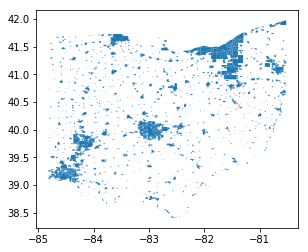

In [132]:
gdf.plot()

In [178]:
sales_ratio=sales_ratio[sales_ratio['Type']=='County']

In [180]:
sales_ratio['fips']=sales_ratio.County.map(lambda u: find_county(u.lower().title(),'OH').name)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [183]:
a=pd.pivot_table(sales_ratio,index='County',values='Market to Price Ratio',columns='Year')

In [185]:
a['fips']=a.index.map(lambda u: find_county(u.lower().title(),'OH').name)

In [187]:
a.head()

Year         2005    2006    2007    2008    2009    2010    2011    2012  \
County                                                                      
ADAMS      0.8141  0.7744  0.8438  0.8627  0.8800  0.9121  0.8808  0.9089   
ALLEN      0.8319  0.8952  0.8994  0.9304  0.9273  0.9389  0.9593  0.9406   
ASHLAND    0.8601  0.8620  0.8750  0.9474  0.9922  1.0017  0.9664  0.9439   
ASHTABULA  0.8475  0.8421  0.8468  0.9520  1.0018  1.0209  0.9582  0.9853   
ATHENS     0.8722  0.8336  0.8347  0.9380  0.9495  0.9212  0.9229  0.9633   

Year         2013    2014    2015    2016   fips  
County                                            
ADAMS      0.9426  0.9175  0.9073  0.8257  39001  
ALLEN      0.9198  0.9073  0.9029  0.8680  39003  
ASHLAND    0.9487  0.8795  0.8518  0.8164  39005  
ASHTABULA  0.9592  0.9178  0.9091  0.8859  39007  
ATHENS     0.9154  0.9274  0.8989  0.8816  39009

In [188]:
a.to_csv("../input/third2/oh/sales_ratio_with_fips.csv")

### ia

In [190]:
!ls ../input/third2/ia/*.csv

../input/third2/ia/sr2011.pdf.csv  ../input/third2/ia/sr2014.pdf.csv
../input/third2/ia/sr2012.pdf.csv  ../input/third2/ia/sr2015.pdf.csv
../input/third2/ia/sr2013.pdf.csv  ../input/third2/ia/sr2016.pdf.csv


In [201]:
lst=[]
for year in range(2011,2017):
    a=pd.read_csv("../input/third2/ia/sr{}.pdf.csv".format(year))
    a['year']=year
    lst.append(a)
sales_ratio=pd.concat(lst)

In [202]:
sales_ratio['r']=sales_ratio['SalesRatioMedian'].map(lambda u: float(u.replace("%",''))/100)

In [216]:
notcounties=sales_ratio.JURISDICTION.map(lambda u: "" if '-' not in u else u.split('-')[0].strip())
notcounties=set([ u.lower() for u in notcounties if u])
notcounties

{'cerro gordo',
 'clinton',
 'dubuque',
 'johnson',
 'linn',
 'scott',
 'story',
 'woodbury'}

In [214]:
sales_ratio['name']=sales_ratio.JURISDICTION.map(lambda u: u.split('-')[0].strip().lower())

In [217]:
sales_ratio=sales_ratio[~sales_ratio['name'].isin(notcounties)]

In [218]:
sales_ratio.head()

JURISDICTION  Numberof Sales SalesRatioMean SalesRatioMedian  \
0        ADAIR              46         114.3%           104.9%   
1        ADAMS              30         109.5%           97.38%   
2    ALLAMAKEE             112         105.0%           96.38%   
3    APPANOOSE              81         108.4%           96.93%   
4      AUDUBON              40         106.9%           95.63%   

   CoefficientofVariation  StandardDeviation WeightedMean     PRD     COD  \
0                  39.757             0.4544       100.3%  114.0%  28.10%   
1                  49.584             0.5430       93.22%  117.5%  33.15%   
2                  27.712             0.2910       95.03%  110.5%  21.16%   
3                  37.038             0.4015       94.30%  114.9%  28.56%   
4                  38.603             0.4128       95.21%  112.3%  30.77%   

   year       r       name  
0  2011  1.0490      adair  
1  2011  0.9738      adams  
2  2011  0.9638  allamakee  
3  2011  0.9693  appanoose  
4  2011  0.9563    audubon

In [263]:
a=pd.pivot_table(sales_ratio,index='name',values='r',columns='year')

In [264]:
def find_county(name,state="NC"):
    if name.lower()=='obrien':
        name="O'Brien"
    a=fips.county_name.map(lambda u: name in u)
    a=fips[a]
    a=a[a.state_name==state]
    def g(u,x):
        b=u.lower().split(" ")
        #print x, b
        return x.lower() in b 
    if len(a)>1:
        a=a[a.county_name.map(lambda u: g(u,name))]
    assert len(a)<=1, str(a)+"\n" + name
    return np.nan if len(a)==0 else  a.index[0]

In [265]:
a['fips']=a.index.map(lambda u: find_county(u.lower().title(),'IA'))

In [266]:
a[a.isnull().sum(1)>0]

year             2011  2012  2013  2014  2015    2016 fips
name                                                      
ames              NaN   NaN   NaN   NaN   NaN  0.8994  NaN
cedar rapids      NaN   NaN   NaN   NaN   NaN  0.9643  NaN
city of clinton   NaN   NaN   NaN   NaN   NaN  1.0160  NaN
city of dubuque   NaN   NaN   NaN   NaN   NaN  0.9102  NaN
davenport         NaN   NaN   NaN   NaN   NaN  0.9325  NaN
iowa city         NaN   NaN   NaN   NaN   NaN  0.9156  NaN
mason city        NaN   NaN   NaN   NaN   NaN  0.9564  NaN
sioux city        NaN   NaN   NaN   NaN   NaN  0.8663  NaN

In [267]:
a=a[~a['fips'].isnull()]

In [268]:
a.to_csv("../input/third2/ia/sales_ratio_with_fips.csv")

# ohter

In [15]:
a=dd.read_parquet("../input/split/37/2017/tax_hist.parq").compute().set_index('parcelid')


In [16]:
feat_county = features.get("county", "37") 
a['county'] = feat_county.loc[a.index ]

In [19]:
a['r']=a.taxamount/a.taxvaluedollarcnt

In [20]:
a.head()

assessmentyear  taxratecodearea  improvementmarketvalue  \
parcelid                                                             
103515622            2017           9000.0                     NaN   
103497146            2017           9000.0                     NaN   
103497145            2017           9000.0                     NaN   
103497144            2017           9000.0                     NaN   
103497123            2017           9000.0                     NaN   

           structuretaxvaluedollarcnt  totalassessedvalue  \
parcelid                                                    
103515622                     40775.0             53600.0   
103497146                     40804.0             65400.0   
103497145                    122300.0            141300.0   
103497144                     32200.0             51200.0   
103497123                     67050.0             90800.0   

           totalappraisedvalue  taxdelinquencyamount    taxamount  \
parcelid                                                            
103515622                  NaN                   NaN   594.140015   
103497146                  NaN                   NaN   712.619995   
103497145                  NaN                   NaN  1474.660034   
103497144                  NaN                   NaN   570.049988   
103497123                  NaN                   NaN   967.630005   

           improvementappraisedvalue  taxvaluedollarcnt  edition  \
parcelid                                                           
103515622                        NaN            53600.0       22   
103497146                        NaN            65400.0       22   
103497145                        NaN           141300.0       22   
103497144                        NaN            51200.0       22   
103497123                        NaN            90800.0       22   

           landassessedvalue  taxdelinquencyyear  landappraisedvalue  \
parcelid                                                               
103515622            12825.0                 NaN                 NaN   
103497146            24596.0                 NaN                 NaN   
103497145            19000.0                 NaN                 NaN   
103497144            19000.0                14.0                 NaN   
103497123            23750.0                 NaN                 NaN   

           totalmarketvalue  improvementassessedvalue  landtaxvaluedollarcnt  \
parcelid                                                                       
103515622               NaN                   40775.0                12825.0   
103497146               NaN                   40804.0                24596.0   
103497145               NaN                  122300.0                19000.0   
103497144               NaN                   32200.0                19000.0   
103497123               NaN                   67050.0                23750.0   

           landmarketvalue county         r  
parcelid                                     
103515622              NaN  37051  0.011085  
103497146              NaN  37051  0.010896  
103497145              NaN  37051  0.010436  
103497144              NaN  37051  0.011134  
103497123              NaN  37051  0.010657

In [23]:
#a[a.county=='37065'].sort_values('r',ascending = False)